In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

# Final Report

Developed by

- Sunghwan Moon, Jungmin Kim, Seunghyeon Park, Bojing Gui

## Introduction

### (1) Problem

With the emergence of edge devices such as apple watch and Fit-bit, the use of personalized health data is becoming more prevalent. Therefore, if we can make good use of personalized health data such as biometric signals in edge devices, we will be able to easily monitor our health conditions such as our sleep patterns.


However, due to the nature of the edge device, personalized health data cannot be shared with one another, limiting the learning of a huge quantity of data. Moreover, since it must be embedded in the edge device model, the size of the personalized model itself is limited.

Our problem setting is characterized by three main issues:

*  Lack of label in sleep stage classification label.
*  Existence of multimodalities in bio-signal data.
*  Downstream task for personalized model.

### (2) Related Work

- FOCAL Framework

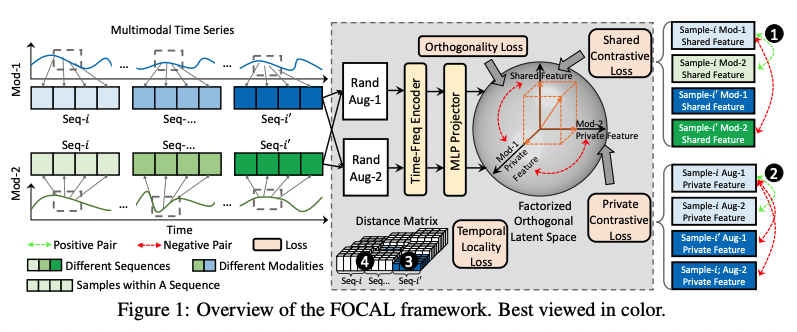

In [ ]:
Image(filename='C:/Users/user/Desktop/Biosignal/FM_for_bio_signal/asset/FOCAL_figure.png')

The FOCAL Framework, proposed in [FOCAL: Contrastive Learning for Multimodal Time-Series Sensing Signals in Factorized Orthogonal Latent Space, 2023], is a self-supervised multimodal contrastive framework. And, in this case, not only is shared information between sensory modalities extracted, but exclusive modality information is not explicitly considered, which could be essential to understanding the underlying sensing physics. We intend to integrate subject-aware learning to this strategy.

- Subject-Aware Contrastive Learning for Biosignals

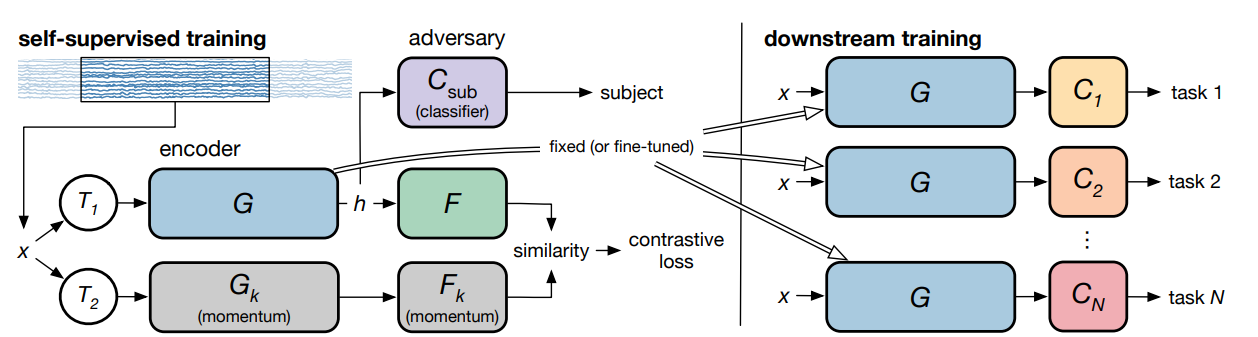

In [ ]:
Image(filename='C:/Users/user/Desktop/Biosignal/FM_for_bio_signal/asset/subject_aware_image.png')

This study presents a methodology for dealing with Intersubject variability when learning representations for biosignals. Intersubject variability can be interpreted as a different domain for each subject. The domain shift from subject to subject can be modeled and corrected with adversarial training. Through this adversarial training, the model can also be promoted to learn domain-invariant features. We also used adversarial training to learn subject invariant features in our learning methodology.

## Method

### Project Overview


In our big overview, we expect that the foundation model generates informative representative feature from large bio-signal dataset, and it can improve the downstream task in the restricted environment where people cannot share bio-signal data with others.

Specifically, we will attempt to develop the foundation model using bio-signal (ECG, Heart Rate) [1] for applying the sleep stage classification from the personal data of edge devices [2], such as Apple Watch or Fit-bit. It is hard to get high performance by only using personally own data from edge devices and to train the model, as limitation of the amount of data for train and low hardware resources of edge devices. We expect that the foundation model generates informative representative feature from large bio-signal dataset, and it can improve the downstream task in the restricted environment that people cannot share bio-signal data to others.

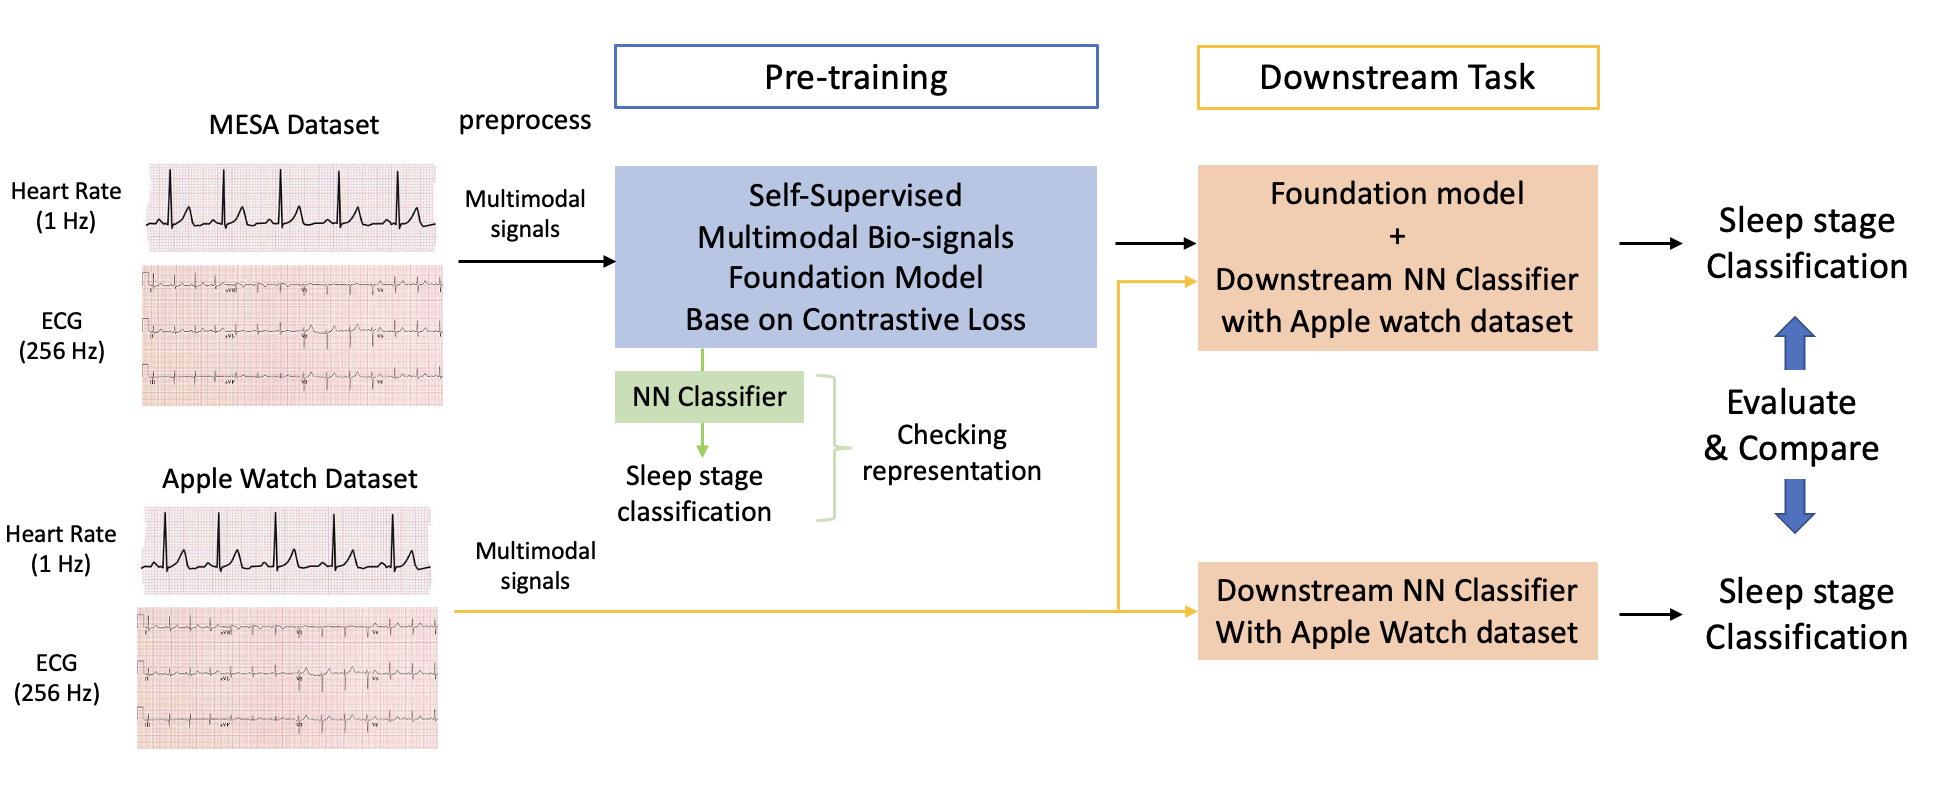

In [ ]:
Image(filename='C:/Users/user/Desktop/Biosignal/FM_for_bio_signal/asset/overall_task_architecture.png')

### Foundation Model


We present the issue that the personalized model in the edge device lacks sufficient data to learn each personalized model. We intend to suggest a solution to the problem by creating a foundation model from a huge amount of bio-signal data that has been made public and improving the performance of the personalized model in the edge device using the foundation model. We plan to develop a foundation model that takes into account each of the 3 issues we established for the problem setting .









Our proposed strategy involves using a huge quantity of publically available bio-signal data to build a foundation model, which can then be used to improve the performance of personalized models on edge devices.

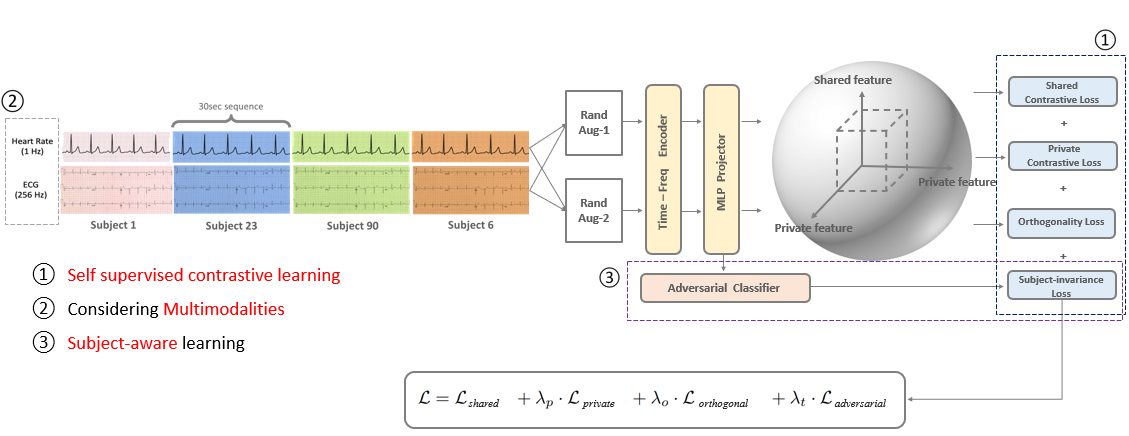

In [ ]:
Image(filename='C:/Users/user/Desktop/Biosignal/FM_for_bio_signal/asset/foundation_model_structure.png')

Specifically, we used MESA dataset, which is open to public in building our foundation model. And we tried to utilize the foundation model to do the downstream task with individual apple watch dataset. By leveraging the representation power of the foundation model, we expect the personalized sleep stage classification model to get better performance than the case with a classification model without the foundation model.

In [ ]:
# to-do: loss function

Previous studies focusing on points each existed, but did not take into account of all the relevant factors essential for the personalized model, so we newly propose the following model satisfiying these points.

##### (1) Multi Modal Contrastive Learning

##### a. Contrastive Loss function

First, we tried to fully utilize various modalities in public datset in order to create an advanced foundation model.

To fully utilize the multimodal signal, contrastive learning was constructed by dividing the shared features and each private features.

1) How to construct positive and negative pair

2) Shared/Private/Orthogonal features

##### (2) Subject Invariant

In addition, for subject aware learning, we trained a sub-classifier to classify the subject using a hidden vector in the encoder, and we used the subject loss as an adversarial loss to induce the encoder to learn the subject invariant feature.

##### a. adversarial classifier

##### b. subject invariance loss

##### (3) Backbone Model for contrastive learning

##### a. Deepsense ([Reference](https://github.com/akaraspt/tinysleepnet))

In [1]:
Image(filename = 'C:/Users/user/Desktop/Biosignal/FM_for_bio_signal/asset/tinysleepnet.png', width=600, height=800)

NameError: name 'Image' is not defined

### Downstream

##### 1. Baseline

##### a. DeepSense

The architecture for the downstream classifier is shown below. This will be used as the baseline comparison for our model. The neural network will take in the two inputs, heart rate and ECG. The ECG will be processed through convolutional layers and a LSTM before the inputs are concatenated and fully connected layers are used for classification.

##### 2. Classifier With Foundation Model

##### a. Feed forward classifier - Foundation downstream classifier

## Experiment

### 1. Dataset

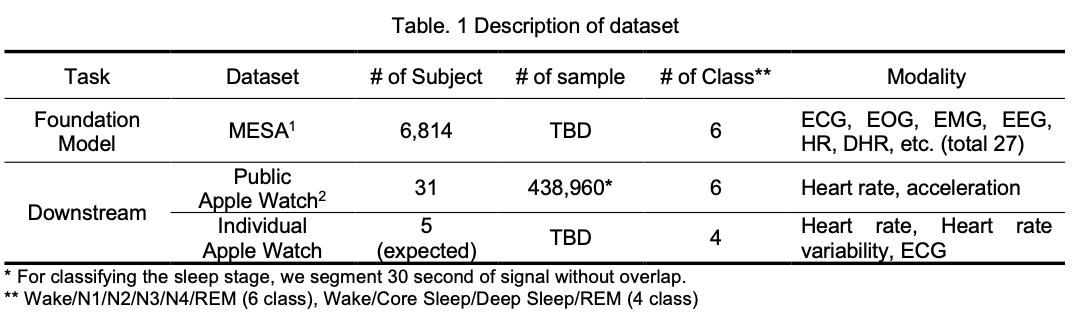

In [ ]:
Image(filename='C:/Users/user/Desktop/Biosignal/FM_for_bio_signal/asset/dataset_description_table.png')

We used 356,062 samples from the public MESA data set of 125 subjects out of 6,814. And we chose to use ECG and Heart rate for modality since we could only gain those two from the apple watch data. And we collected individual apple watch dataset from 5 friends to perform our downstream task. We made a subject segment pair for our contrastive learning and we splitted the data into portion of 100 by 25 by 25.

### 2. Preprocessing

1) MESA data
- We needs to segment the bio signal (heart rate and ecg) to 30 seconds (1 epoch) because sleep stage is decided from 30 seconds data in down stream
- We select validation epoch without any problems, such as disconnection error, mis-collection time between bio signals.

- Heart Rate
    - After selecting validation epoch, the heart rate was **interpolated** to have a value for every 1 second, **smoothed** and **filtered** to amplify periods of high change by convoloving with a diffrence of Gaussian filter and **normalized** by dividing by the 90th percentile in the absolute diffrence between each heart rate measurement and the mean heart rate over the sleep periods
- Electrocardiogram (ECG=EKG)
    - After selecting validation epoch, the ECG was **smoothed** and **filtered** by Gaussian filter for denoising the ECG


2) Apple watch data
- We collected Apple watch data which contains heart rate and acceleration
- We plan to preprocess it following the previous study titled "**Sleep stage prediction with raw acceleration and photoplethysmography heart rate data derived from a consumer wearable device** (Olivia, et al.)"

##### 2-1-1 Preprocessing Result (MESA)

We use **1,405 subjects** among 2,056 after quality contorl

Total segementation (1 epoch during 30s) is **1,487,316**, which is **same number of label (sleep stage)**

Following images show the result of preprocessing on **subject0001** from MESA dataset

In [ ]:
# ECG Image
Image(filename="../asset/ecg_0001.png")

In [ ]:
# Heart Rate
Image("../asset/heartrate_0001.png")

In [ ]:
# PSG Status (Sleep Stages)
Image("../asset/psg_0001.png")

##### 2-1-2 Preprocessing Result (Apple watch)
- We collect 5 real Apple watch dataset which was collected during 7 days


### 3. Training

#### (1) Training Foundation Model

#### (2) Training Basemodel

## Experiment